In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
spam=files.upload(
)

Saving Spam to Spam


In [ ]:
sms=pd.read_csv('Spam', sep='\t')
sms.dropna(how='any', inplace=True, axis=1)
sms.columns= ['label', 'message']

sms.head()

,label,message
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


In [ ]:
sms.describe()

,label,message
count,5571,5571
unique,2,5168
top,ham,"Sorry, I'll call later"
freq,4824,30


In [ ]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5571 non-null   object
 1   message  5571 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
sms['label_num'] = lb.fit_transform(sms['label'])
sms.head()

,label,message,label_num
0,ham,Ok lar... Joking wif u oni...,0
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
2,ham,U dun say so early hor... U c already then say...,0
3,ham,"Nah I don't think he goes to usf, he lives aro...",0
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1


In [ ]:
sms['message_len']= sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,Ok lar... Joking wif u oni...,0,29
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
2,ham,U dun say so early hor... U c already then say...,0,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147


Text(0.5, 0, 'Message Length')

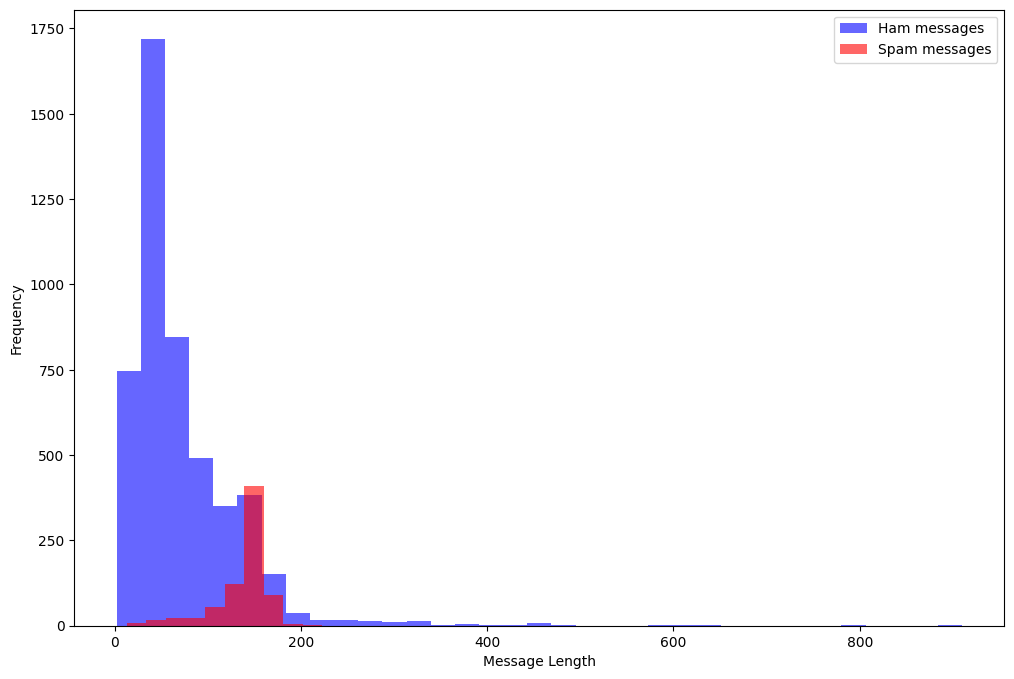

In [ ]:
plt.figure(figsize=(12, 8))

sms[sms.label=='ham'].message_len.plot(bins=35, kind='hist', color='blue',
                                       label='Ham messages', alpha=0.6)
sms[sms.label=='spam'].message_len.plot(kind='hist', color='red',
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [ ]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
sms['clean_msg']=sms.message.apply(text_process)
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
2,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
3,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
4,spam,FreeMsg Hey there darling it's been 3 week's n...,1,147,FreeMsg Hey darling 3 weeks word back Id like ...


In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.clean_msg
y = sms.label_num
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5571,)
(5571,)
(4456,)
(4456,)
(1115,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(X_train)

# learn training data vocabulary, then use it to create a document-term matrix
X_train_dtm = vect.transform(X_train)

# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)


# examine the document-term matrix
print(type(X_train_dtm), X_train_dtm.shape)

# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (4456, 8296)
<class 'scipy.sparse._csr.csr_matrix'> (1115, 8296)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4456x8296 sparse matrix of type '<class 'numpy.float64'>'
	with 37042 stored elements in Compressed Sparse Row format>

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

CPU times: user 4.63 ms, sys: 0 ns, total: 4.63 ms
Wall time: 6.77 ms


MultinomialNB()

In [ ]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)


print("Accuracy =" ,metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("Confision Matrix=")
(metrics.confusion_matrix(y_test, y_pred_class))


Accuracy = 0.9829596412556054
Confision Matrix=


array([[958,  11],
       [  8, 138]])

In [ ]:
# print message text for false positives (ham incorrectly classifier)
X_test[y_pred_class > y_test]

386                                   Customer place call
3414                                    pic Please resend
4556                                 Gettin rdy ship comp
5474                       Dhoni luck win big titleso win
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
2161                   replying boye changed phone number
2336    Aww must nearly deadWell Jez isComing toDo wor...
1081                                   get pic msgs phone
2418    Madamregret disturbancemight receive reference...
5093    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
Name: clean_msg, dtype: object

In [ ]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

67               hear new Divorce Barbie comes Kens stuff
3741                                         22 146tf150p
1457    CLAIRE havin borin time alone wanna cum 2nite ...
1892    CALL 09090900040 LISTEN EXTREME DIRTY LIVE CHA...
2429    Guess IThis first time created web page WWWASJ...
3529    Xmas New Years Eve tickets sale club day 10am ...
190     unique enough Find 30th August wwwareyouunique...
4068    TBSPERSOLVO chasing us since Sept for£38 defin...
Name: clean_msg, dtype: object

In [ ]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([4.28821829e-06, 2.09801549e-05, 1.00000000e+00, ...,
       1.34676985e-04, 2.45035794e-15, 3.32545396e-05])

In [ ]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9852446385908366

In [ ]:
import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([1.15936190e-02, 9.99821818e-03, 9.89632070e-01, ...,
       5.12061129e-03, 4.64856351e-04, 3.00508424e-03])

In [ ]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9802690582959641
=======Confision Matrix===========
[[968   1]
 [ 21 125]]
=======ROC AUC Score===========
0.9917263949559637
